In [1]:
# Animated Bar Chart Example

## Stock data

2006 AABA Financials Altaba
2006 AAPL Technology Apple Inc.
2006 AMZN Technology Amazon.com Inc.
2006 AXP Financials American Express Company
2006 BA Industrials Boeing Company


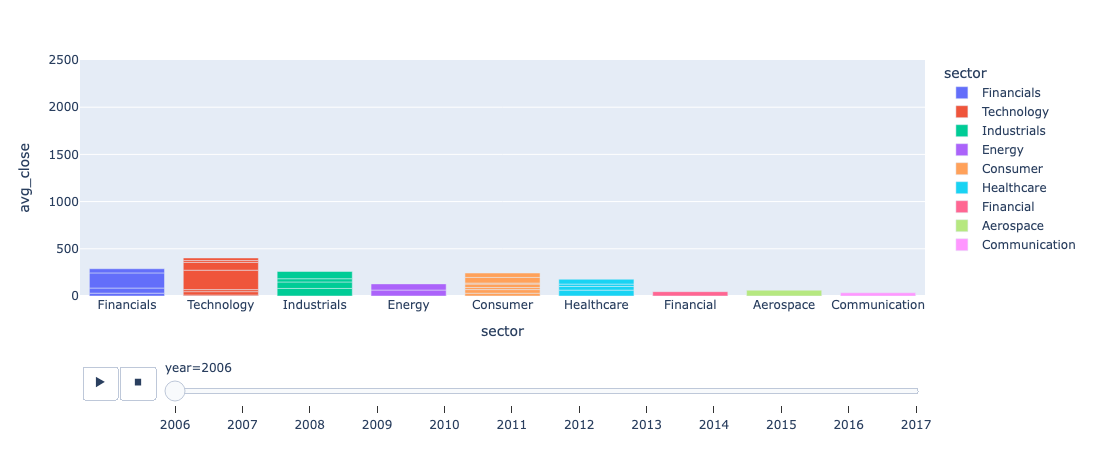

In [5]:
import plotly.express as px
import pandas as pd

# Stock Data origin
# Licensed CC0: public domain
# https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231

# load DataFrame: all_stocks_2006-01-01_to_2018-01-01.csv
df_stocks = pd.read_csv('../data/all_stocks_2006-01-01_to_2018-01-01.csv',comment='#')
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks['year'] = df_stocks['Date'].dt.year

# load DataFrame sector/company data
df_sectors = pd.read_csv('../data/stock_sector_company.csv',comment='#')

# create new DataFrame: merge stock data with sector/company data based on matching 'Name' to 'stock'
df_merged = pd.merge(df_stocks, df_sectors, left_on='Name', right_on='stock', how='left')

# create new DataFrame: group values by year, stock, sector, company and get averages 
df_yearly = df_merged.groupby(['year','stock','sector','company'])[['Close', 'Volume','Open','High','Low']].mean().reset_index()

# rename numeric data to note that they are averages per year now
df_yearly.rename(columns={'Close': 'avg_close', 'Volume':'avg_volume', 'Open': 'avg_open','High': 'avg_high','Low':'avg_low'}, inplace=True)

# print(df_yearly['avg_close'].min(), df_yearly['avg_close'].max())
# for i in range(5):
#     print(df_yearly['year'][i],df_yearly['stock'][i],df_yearly['sector'][i],df_yearly['company'][i])
          
# create plotly figure using Express
fig = px.bar(df_yearly, 
             x='sector', 
             y='avg_close', 
             color='sector',
             animation_frame="year", 
             animation_group="stock", 
             range_y=[0,2500],
             hover_data=['stock','company'])

fig.update_layout(
            hoverlabel=
            dict(
             font_color="white"
            ) 
)

# provide animation duration and figure height
fig.update_layout(transition = {'duration': 2000}, height=450)

fig.show()

